In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    "mathtext.default": "regular"
})

df = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/python/climate_emissions_analysis/data/owid-co2-data.csv')

In [77]:
# print(df.shape) 
# print(df.columns)
# print(round(df[['year', 'co2', 'co2_per_capita', 'population', 'gdp']].describe(), 2))
# print(df['year'].min(), df['year'].max())
# print(df['country'].nunique())
# print(df.isnull().sum())


Filtering:

In [78]:
# print(df[df['iso_code'].isna()]['country'].unique())
df_countries = df[df['iso_code'].notna()]
# print(df_countries['country'].nunique())
co22024=df_countries[df_countries['year']==2024][['country', 'co2']]
top10 = co22024.sort_values('co2', ascending=False).head(10)


Visualisation:

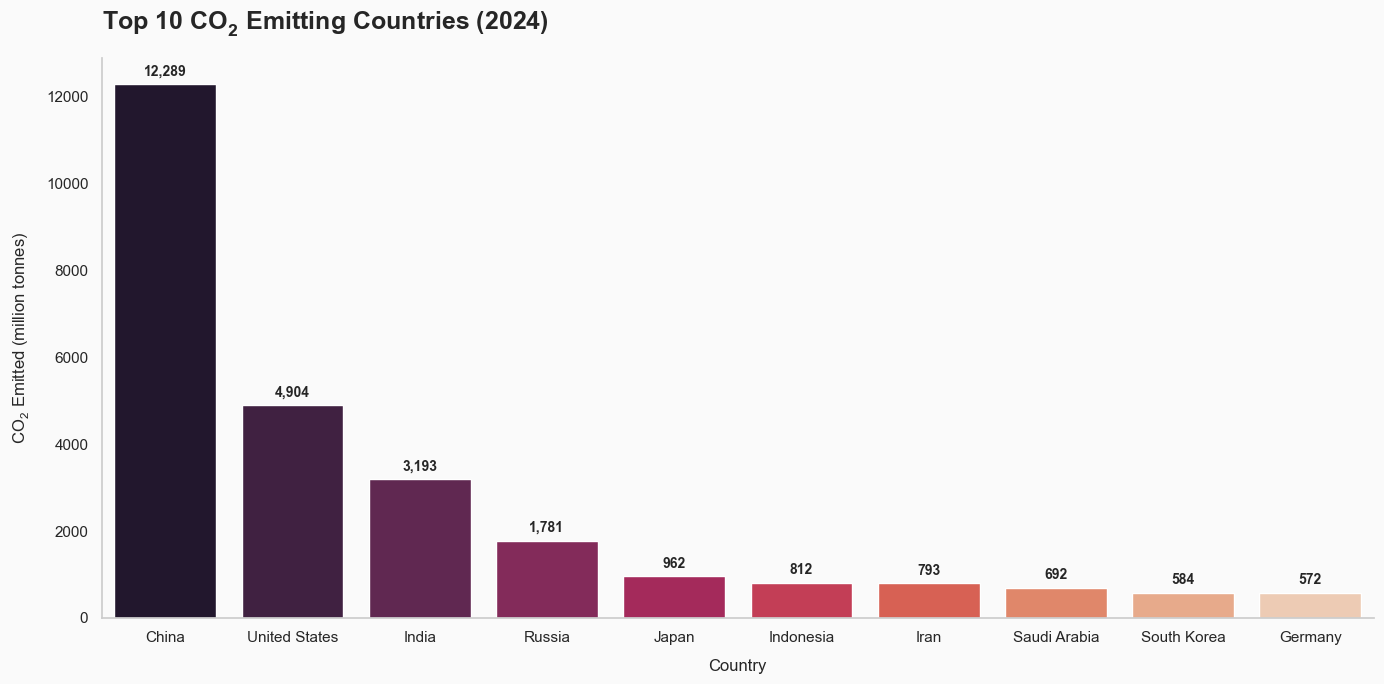

In [79]:
fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#FAFAFA')
ax.set_facecolor('#FAFAFA')

bars = sns.barplot(data=top10, x='country', y='co2', 
                   palette='rocket', hue='country', 
                   legend=False, ax=ax)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

sns.despine()
ax.grid(False)
ax.set_title('Top 10 $CO_2$ Emitting Countries (2024)', 
             fontsize=18, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('Country', fontsize=12, labelpad=10)
ax.set_ylabel('$CO_2$ Emitted (million tonnes)', fontsize=12, labelpad=10)
ax.tick_params(axis='both', labelsize=11)
plt.tight_layout()
plt.show()

The bar graph shows the 10 countries that emitted the most CO² in 2024. China dominates by a significant margin, emitting more than double that of second-place USA, it is a reflection of its role as the world's manufacturing hub. The USA, despite being a highly developed economy, still ranks second, contrasting with other Western nations that have made more significant emission reductions. India ranks third, driven by rapid industrialization and growing energy demands.

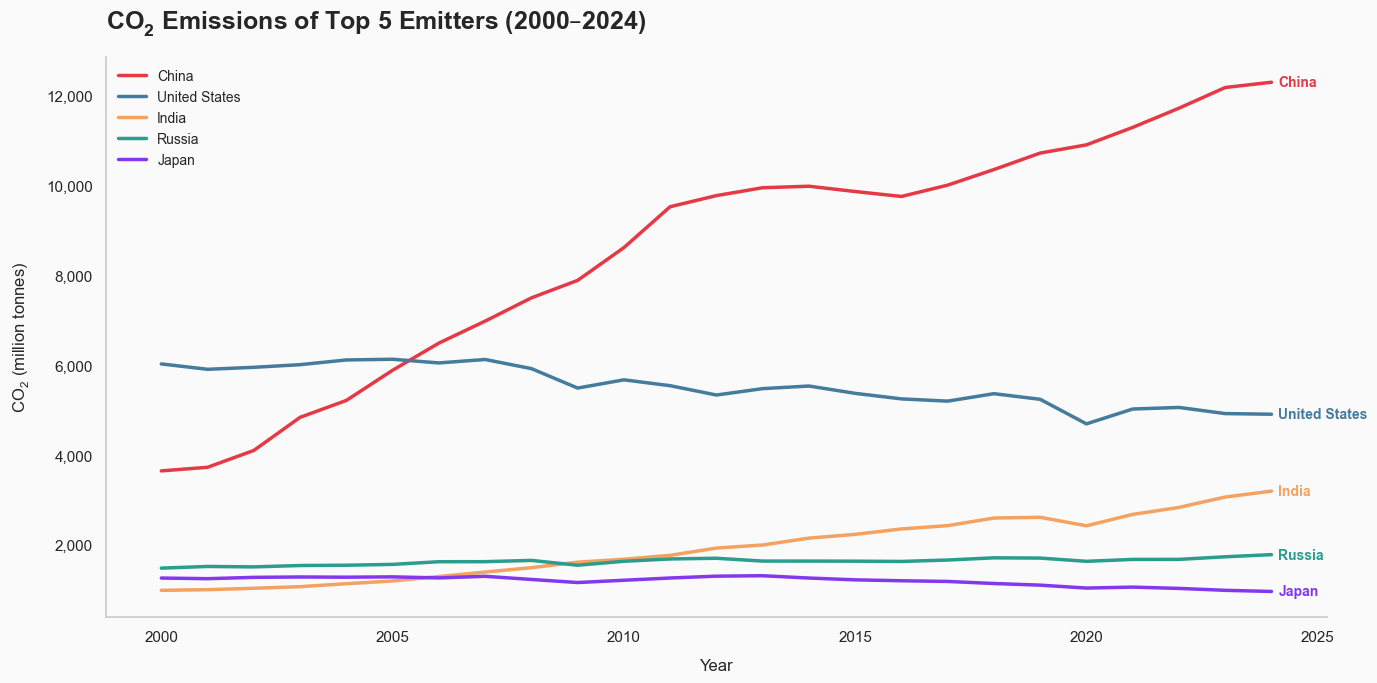

In [80]:
top5 = top10.head(5)
top5_countries = top5['country'].tolist()
# print(top5_countries)
df_top5 = df_countries[(df_countries['country'].isin(top5_countries)) & (df_countries['year'] >= 2000)]




colors = {
    'China': '#E63946',
    'United States': '#457B9D', 
    'India': '#F4A261',
    'Russia': '#2A9D8F',
    'Japan': '#8338EC'
}


legend_order = top5.sort_values('co2', ascending=False)['country'].tolist()

fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#FAFAFA')
ax.set_facecolor('#FAFAFA')

for country in legend_order:
    data = df_top5[df_top5['country'] == country]
    ax.plot(data['year'], data['co2'], 
            label=country, 
            color=colors[country], 
            linewidth=2.5)
    ax.annotate(country, 
                xy=(data['year'].iloc[-1], data['co2'].iloc[-1]),
                xytext=(5, 0),
                textcoords='offset points',
                color=colors[country],
                fontsize=10,
                fontweight='bold',
                va='center')

sns.despine()
ax.grid(False)
ax.set_title('$CO_2$ Emissions of Top 5 Emitters (2000–2024)', 
             fontsize=18, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('Year', fontsize=12, labelpad=10)
ax.set_ylabel('$CO_2$ (million tonnes)', fontsize=12, labelpad=10)
ax.tick_params(axis='both', labelsize=11)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.legend(handles=[plt.Line2D([0], [0], color=colors[c], linewidth=2.5, label=c) 
                    for c in legend_order], 
           fontsize=10, frameon=False)
plt.tight_layout()
plt.show()


This line graph tracks CO² emissions of the top 5 emitting countries from 2000 to 2024. China, which trailed the USA at the turn of the century, surpassed it around 2005 and has grown exponentially since. India is the only other country in this group with a consistently rising trajectory, reflecting both nations' ongoing industrialization and development. In contrast, the USA, Russia, and Japan have all recorded net reductions over the same period, suggesting that the world's most developed economies are beginning to decouple growth from emissions, while the developing giants continue to climb.

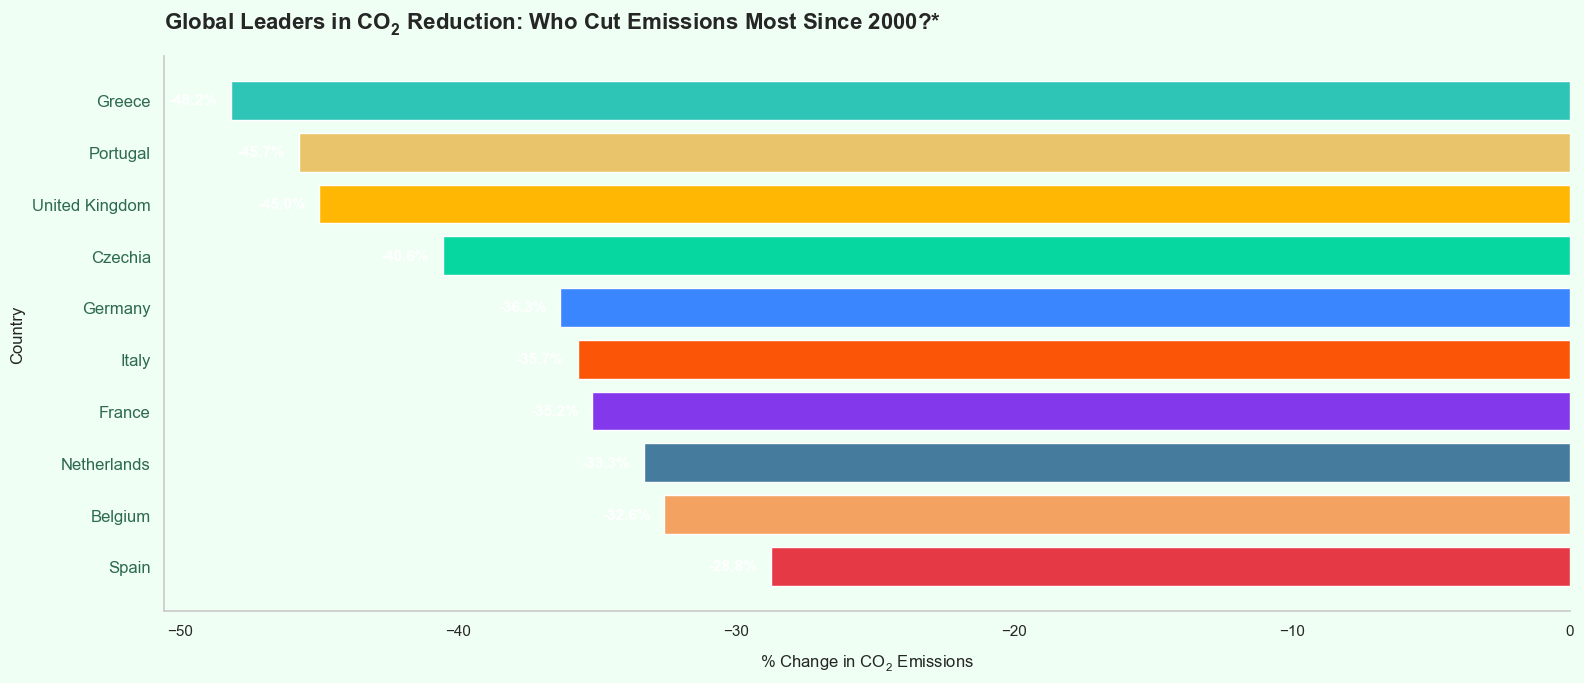

In [81]:
co2_2000 = df_countries[(df_countries['year']==2000) & (df_countries['population']>10000000)][['country','co2']].rename(columns={'co2':'co2_2000'})
co2_2024 = df_countries[(df_countries['year']==2024) & (df_countries['population']>10000000)][['country','co2']].rename(columns={'co2':'co2_2024'})
co2_change = co2_2000.merge(co2_2024, on='country')
# co2_change['change'] = co2_change['co2_2023'] - co2_change['co2_2000']
# top_reducers = co2_change.sort_values('change').head(10)
# print(top_reducers)
exclude = ['Ukraine', 'Syria', 'Yemen']
co2_change = co2_change[~co2_change['country'].isin(exclude)]
co2_change['pct_change'] = ((co2_change['co2_2024'] - co2_change['co2_2000']) / co2_change['co2_2000']) * 100
top_reducers_pct = co2_change.sort_values('pct_change').head(10)
# print(top_reducers_pct)

import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(16, 7))
fig.patch.set_facecolor('#F0FFF4')
ax.set_facecolor('#F0FFF4')

top_reducers_sorted = top_reducers_pct.sort_values('pct_change', ascending=False)

distinct_colors = ['#E63946', '#F4A261', '#457B9D', '#8338EC', '#FB5607', 
                   '#3A86FF', '#06D6A0', '#FFB703', '#E9C46A', '#2EC4B6']

bars = ax.barh(top_reducers_sorted['country'], 
               top_reducers_sorted['pct_change'],
               color=distinct_colors,
               height=0.75)

for bar, val in zip(bars, top_reducers_sorted['pct_change']):
    ax.text(val - 0.5, bar.get_y() + bar.get_height()/2,
            f'{val:.1f}%',
            ha='right', va='center',
            fontsize=11, fontweight='bold', color='white')

sns.despine()
ax.grid(False)
ax.set_title('Global Leaders in $CO_2$ Reduction: Who Cut Emissions Most Since 2000?*',
             fontsize=16, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('% Change in $CO_2$ Emissions', fontsize=12, labelpad=10)
ax.set_ylabel('Country', fontsize=12, labelpad=5)
ax.tick_params(axis='y', labelsize=12, labelcolor='#2D6A4F')
ax.tick_params(axis='x', labelsize=11)
plt.tight_layout()
plt.show()

All top 10 countries that have most significantly reduced CO² emissions since 2000 are European, mostly Western European. 
This suggests that economic development and emission reduction can go hand in hand as these are wealthy, industrialized nations that grew their economies while cutting carbon output.
For the rest of the world, Europe offers a blueprint that sustainability and development are not mutually exclusive.

*Note: Ukraine, Syria and Yemen were excluded from this analysis as their emission reductions are primarily attributed to conflict and economic collapse rather than climate policy.

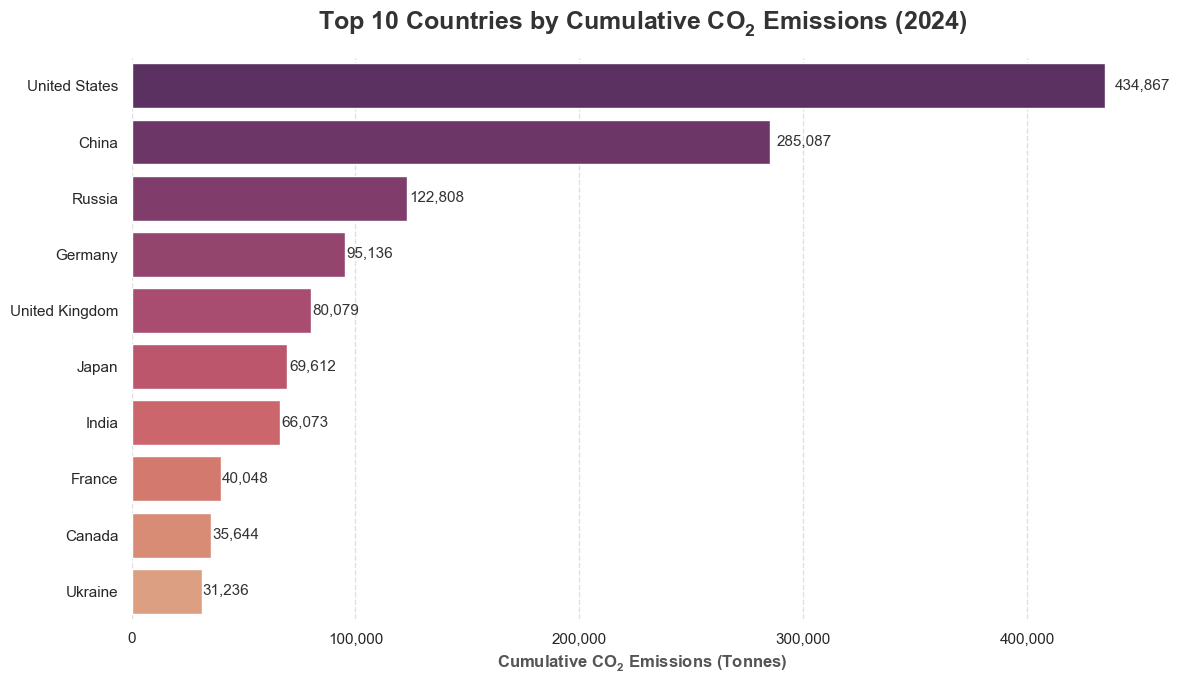

In [82]:
cum2024=df_countries[df_countries['year']==2024][['country', 'cumulative_co2']]
top10cum = cum2024.sort_values('cumulative_co2', ascending=False).head(10)



import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# 1. Set the visual theme
sns.set_theme(style="whitegrid") # Clean white background with gridlines
plt.figure(figsize=(12, 7))      # Wide aspect ratio for better readability

# 2. Create the horizontal bar plot
# We use 'flare' as it represents a heat/emissions theme nicely.
ax = sns.barplot(
    data=top10cum, 
    x='cumulative_co2', 
    y='country', 
    palette='flare_r',
    hue='country',
    legend=False
)

# 3. Customize titles and axes labels
plt.title('Top 10 Countries by Cumulative $CO_2$ Emissions (2024)', 
          fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.xlabel(r'Cumulative $CO_2$ Emissions (Tonnes)', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('', fontsize=12)

# 4. Format the X-axis numbers with commas (e.g., 1,000,000)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# 5. Add data labels directly to the bars
for p in ax.patches:
    width = p.get_width()
    # Position the text slightly to the right of the bar's end
    ax.text(width + (width * 0.01), # Add a 1% buffer space
            p.get_y() + p.get_height() / 2, 
            f'{width:,.0f}',        # Format value with commas
            ha="left", 
            va="center", 
            fontsize=11,
            color='#333333')

# 6. Clean up the chart boundaries (remove top and right borders)
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.6) # Make grid lines subtle
ax.yaxis.grid(False) # Turn off horizontal grid lines for a cleaner look

# Adjust layout to ensure nothing is cut off and display
plt.tight_layout()
plt.show()

When examining cumulative CO² emissions since 1750, the USA stands far above the rest with over 434,000 million tonnes. It is worth noting that USA has emissions more than the combined total of China and Russia, who rank 2nd and 3rd respectively. This reframes the modern narrative around China being the world's biggest polluter. China only became the leading annual emitter recently, while the USA spent over a century industrializing heavily. The countries most responsible for the CO² already accumulated in the atmosphere are largely Western nations, a critical consideration in global climate justice discussions.

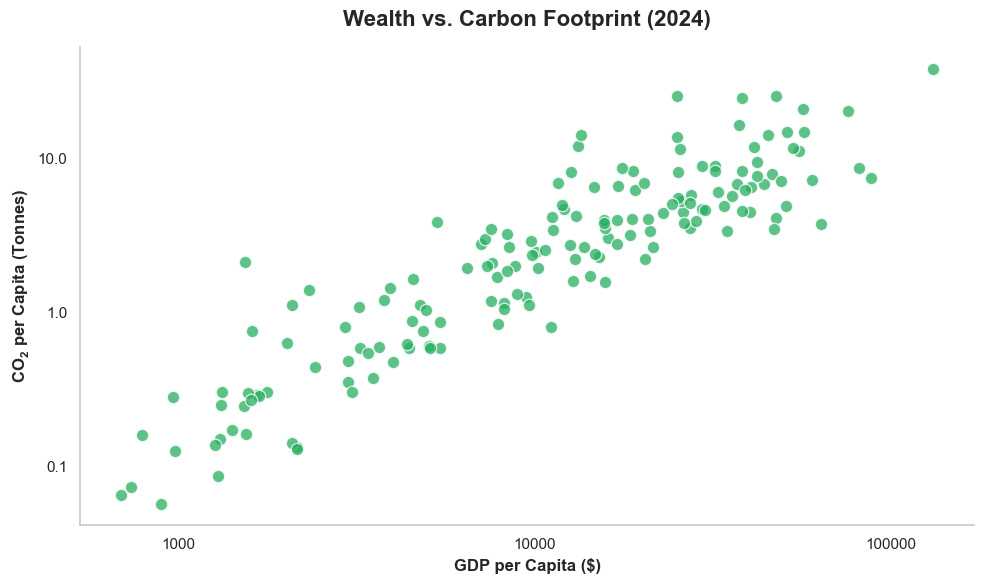

In [107]:
gdpco2 = df_countries[df_countries['year']==2022][['country', 'gdp', 'co2_per_capita', 'population']].dropna()
gdpco2['gdp_per_capita'] = gdpco2['gdp'] / gdpco2['population']
gdpco2_clean = gdpco2[(gdpco2['gdp_per_capita'] > 0) & (gdpco2['co2_per_capita'] > 0)].copy()

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the visual theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the scatterplot directly from your gdpco2 dataframe
ax = sns.scatterplot(
    data=gdpco2_clean, 
    x='gdp_per_capita', 
    y='co2_per_capita', 
    alpha=0.75,
    edgecolor='white',
    linewidth=1,
    color='#27ae60',
    s=80
)

# Log scales (Still keeping these because GDP vs CO2 looks like a messy blob without them!)
# Set the log scales (you already have this)
ax.set_xscale('log')
ax.set_yscale('log')

# --- ADD THIS TO REMOVE SUPERSCRIPTS ---
# Create a standard number formatter and disable scientific notation
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)

# Apply it to both the X and Y axes
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

# Add Titles and Labels
plt.title('Wealth vs. Carbon Footprint (2024)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('GDP per Capita ($)', fontsize=12, fontweight='bold')
plt.ylabel('$CO_2$ per Capita (Tonnes)', fontsize=12, fontweight='bold')

# Clean up borders
sns.despine()
ax.grid(False)

# Display the plot
plt.tight_layout()
plt.show()